Requisitos del proyecto:

● Transformación y limpieza de los datos.
● Análisis descriptivo de los datos.
● Visualización de los datos.
● Informe explicativo del análisis.

In [136]:
#IMPORTAMOS LIBRERIAS Y CARGAMOS LOS DATOS
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl 

banca = pd.read_csv('bank-additional.csv', index_col = 0) #uso la primera fila como indice

clientes_2012 = pd.read_excel('customer-details.xlsx', sheet_name = '2012', index_col = 0)
clientes_2013 = pd.read_excel('customer-details.xlsx', sheet_name = '2013', index_col = 0)
clientes_2014 = pd.read_excel('customer-details.xlsx', sheet_name = '2014', index_col = 0)

In [137]:
#CAMBIO LOS PARAMETROS DE LAS COLUMNAS QUE TENGA 0 Y 1 POR 'YES' Y 'NO'
def cambio_si_no(x):
    if x == 1.0:
        return 'YES'
    elif x == 0.0:
        return 'NO'
    else:
        return x

banca['default'] = banca['default'].apply(cambio_si_no)
banca['housing'] = banca['housing'].apply(cambio_si_no)
banca['loan'] = banca['loan'].apply(cambio_si_no)

In [138]:
#PARAMETROS ESTADISTICOS
print (f"La media de edad de nuestros clientes es de {round(banca['age'].mean(), 2)} años")
print (f"La mediana de edad de nuestros clientes es de {round(banca['age'].median(), 2)} años")
print (f"La desviacion estandar de edad de nuestros clientes es de {round(banca['age'].std(), 2)} años")


La media de edad de nuestros clientes es de 39.98 años
La mediana de edad de nuestros clientes es de 38.0 años
La desviacion estandar de edad de nuestros clientes es de 10.44 años


Text(0, 0.5, 'total')

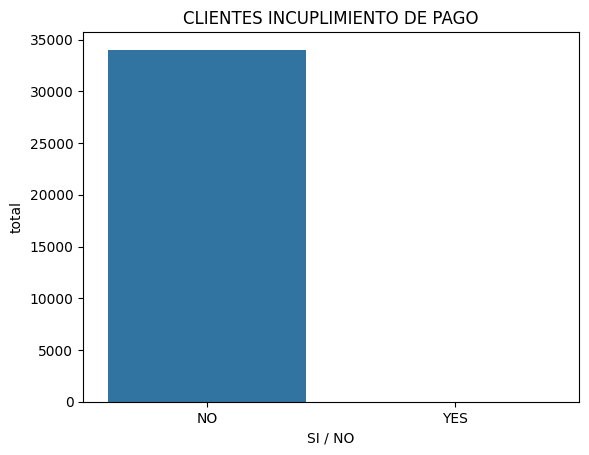

In [139]:
#VAMOS A VER CUANTOS CLINETES TIENEN UNA HISTORIAL DE INCUPLIMIENTOS DE PAGOS
impagos = banca.groupby('default')['id_'].count().reset_index()
sns.barplot(data=impagos, x='default', y='id_').set_title("CLIENTES INCUPLIMIENTO DE PAGO")
#cambio el nombre de los ejes
plt.xlabel("SI / NO")
plt.ylabel("total")

Text(0, 0.5, 'total')

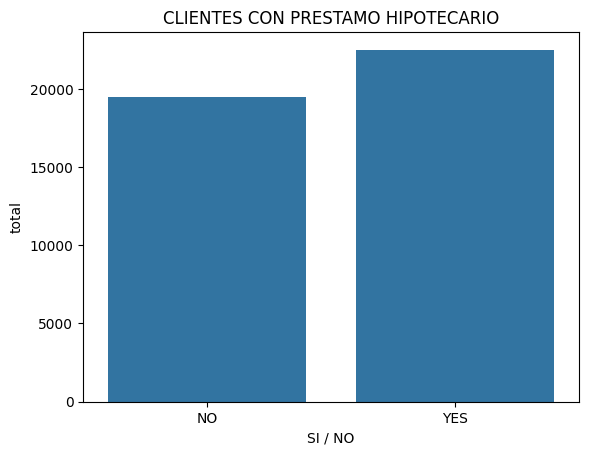

In [140]:
#VAMOS A VER CUANTOS CLINETES TIENEN UN PRESTAMO HIPOTECARIO
hipoteca = banca.groupby('housing')['id_'].count().reset_index()
sns.barplot(data=hipoteca, x='housing', y='id_').set_title("CLIENTES CON PRESTAMO HIPOTECARIO")
#cambio el nombre de los ejes
plt.xlabel("SI / NO")
plt.ylabel("total")

Text(0, 0.5, 'total')

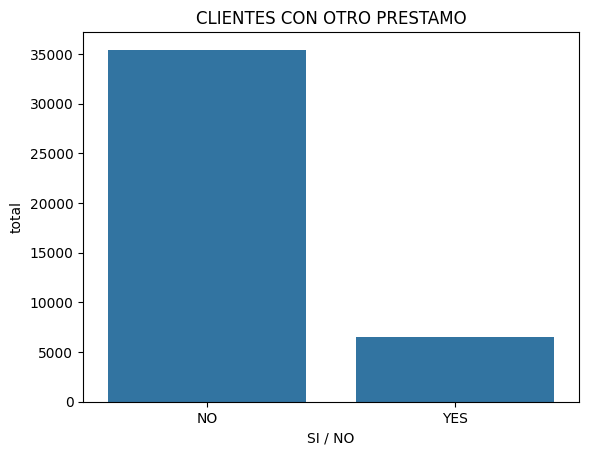

In [141]:
#VAMOS A VER CUANTOS CLINETES TIENEN OTRO TIPO DE PRESTAMO 
otros = banca.groupby('loan')['id_'].count().reset_index()
sns.barplot(data=otros, x='loan', y='id_').set_title("CLIENTES CON OTRO PRESTAMO")
#cambio el nombre de los ejes
plt.xlabel("SI / NO")
plt.ylabel("total")

Text(0, 0.5, 'total')

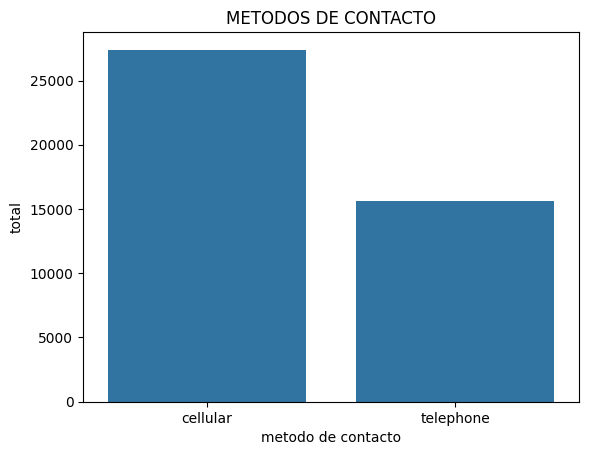

In [142]:
#¿CUAL SERA EL METODO POR EL CUAL MAS SE CONTACTO A LOS CLIENTES?
contacto = banca.groupby('contact')['id_'].count().reset_index()
sns.barplot(data=contacto, x='contact', y='id_').set_title("METODOS DE CONTACTO")
#cambio el nombre de los ejes
plt.xlabel("metodo de contacto")
plt.ylabel("total")


Text(0, 0.5, 'estudios')

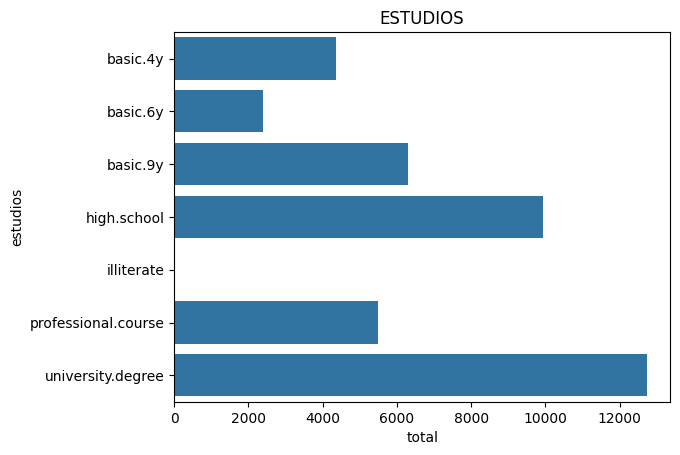

In [143]:
estudios = banca.groupby('education')['id_'].count().reset_index()
sns.barplot(data = estudios, x = 'id_', y = 'education').set_title('ESTUDIOS')
#cambio el nombre de los ejes
plt.xlabel("total")
plt.ylabel("estudios")

In [144]:
#¿CUAL ES EL TIEMPO PROMEDIO DE LLAMADA POR CLIENTE?
print(f"El tiempo promedio por llamada es de {round(banca['duration'].mean(), 2)} segundos")

El tiempo promedio por llamada es de 257.74 segundos


VAMOS A ANALIZAR A CLIENTES QUE SE HAN SUSCRITO PARA VER QUE PARAMETROS SUELEN CUMPLIR


In [145]:
#DEFINIMOSL UN NUEVO DATAFRAME CON AQUELLOS CLIENTES QUE COMPRARON
df_compras = banca[banca['y'] == 'yes']

El tiempo promedio en llamada con los clientes que han suscrito es de 551.62 segundos


Text(0, 0.5, 'estado civil')

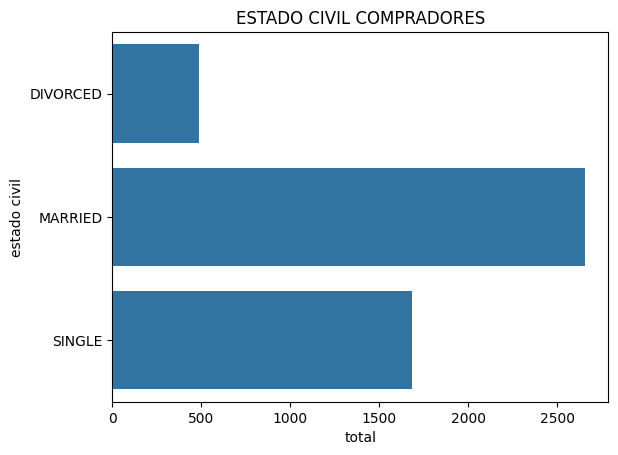

In [146]:
#¿CUAL ES EL TIEMPO PROMEDIO PARA CLIENTES QUE SI CONTRATARON?
print(f"El tiempo promedio en llamada con los clientes que han suscrito es de {round(df_compras['duration'].mean(), 2)} segundos")

estado_civil_compradores = df_compras.groupby('marital')['id_'].count().reset_index()
sns.barplot(data = estado_civil_compradores, x = 'id_', y = 'marital').set_title('ESTADO CIVIL COMPRADORES')
#cambio el nombre de los ejes
plt.xlabel("total")
plt.ylabel("estado civil")

Text(0, 0.5, 'estudios')

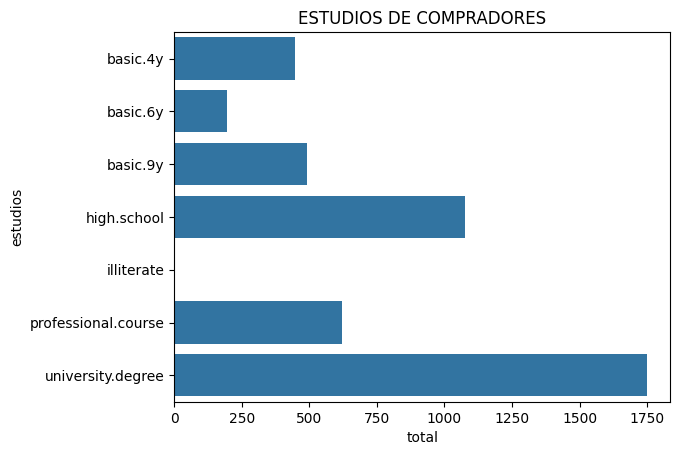

In [147]:
estudios_compradores = df_compras.groupby('education')['id_'].count().reset_index()
sns.barplot(data = estudios_compradores, x = 'id_', y = 'education').set_title('ESTUDIOS DE COMPRADORES')
#cambio el nombre de los ejes
plt.xlabel("total")
plt.ylabel("estudios")

Text(0, 0.5, 'total')

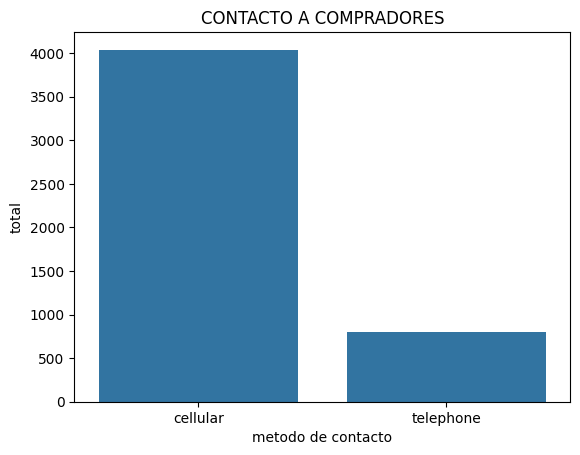

In [148]:
#¿CON QUE METODO DE CONTACTO SE HABLÓ CON CLIENTES QUE SUSCRIBIERON?
contacto_compradores = df_compras.groupby('contact')['id_'].count().reset_index()
sns.barplot(data = contacto_compradores, x = 'contact', y = 'id_').set_title('CONTACTO A COMPRADORES')
#cambio el nombre de los ejes
plt.xlabel("metodo de contacto")
plt.ylabel("total")

In [149]:
#MEDIA DE CONTACTOS A CLIENTES QUE SUSCRIBIERON
print(f"La media de contactos para los clientes que se suscrbieron fue de {round(df_compras['campaign'].mean(), 2)} contactos")

La media de contactos para los clientes que se suscrbieron fue de 2.05 contactos


In [150]:
#EDAD MEDIA DE COMPRADORES
print (f"La edad media de las personas que se suscribieron ha sido de {round(df_compras['age'].mean() ,2)} años \nfrente a la edad general de todos los contactados que ha sido de {round(banca['age'].mean() ,2)} años")

La edad media de las personas que se suscribieron ha sido de 40.89 años 
frente a la edad general de todos los contactados que ha sido de 39.98 años


In [151]:
#¿CUALES SON LOS 3 TRABAJOS MAS FRECUENTES ENTRE LOS COMPRADORES?
mejores3 = df_compras.groupby('job')['id_'].count().reset_index().sort_values(by = 'id_', ascending = False).head(3)
mejores3.set_index(['job', 'id_'])

,
job,id_
admin.,1415
technician,762
blue-collar,665


Text(0.5, 0, 'total')

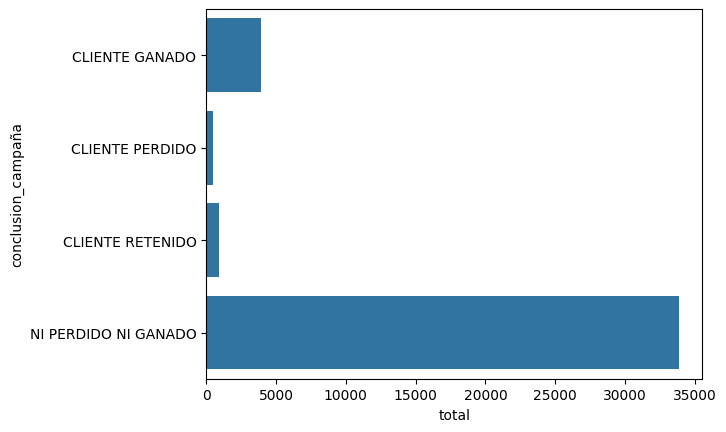

In [152]:
#VAMOS A VER SI HEMOS POERDIDO/GANADO CLIENTES BASANDONOS EN LOS RESULTADOS DE LA CAMPAÑA ANTERIOR

#primero vamos a ver cuantos clientes contraton la campaña anterior
resultados_anterior_campaña = banca.groupby('poutcome')['id_'].count().reset_index()

#hacemos uso del metodo loc para buscar el valor de los exitos
total_exitos_anterior_campaña = resultados_anterior_campaña.iloc[2, 1]

#vemos que clientes se han mantenido, perdido, ganado o ninguna
def recuento(col_anterior, col_ahora):
    if col_anterior == 'SUCCESS' and col_ahora == 'yes':
        return 'CLIENTE RETENIDO'
    elif col_anterior == 'SUCCESS' and col_ahora == 'no':
        return 'CLIENTE PERDIDO'
    elif col_anterior == 'FAILURE' and col_ahora == 'yes':
        return 'CLIENTE GANADO'
    elif col_anterior == 'NONEXISTENT' and col_ahora == 'yes':
        return 'CLIENTE GANADO'
    elif col_anterior == 'NONEXISTENT' and col_ahora == 'no':
        return 'NI PERDIDO NI GANADO'

#aplicamos la funcion usando dos parametros con apply()
banca['conclusion_campaña'] = banca.apply(lambda x: recuento(x['poutcome'], x['y']), axis = 1)

#hacemos el recuento
resultado = banca.groupby('conclusion_campaña')['id_'].count().reset_index()

#vamos a graficarlo
sns.barplot(data = resultado, x = 'id_', y = 'conclusion_campaña') 
#vemos como hemos ganado una cantidad importantes de clientes que en la campaña anterior nos rechazaron
#cambio el nombre de los ejes
plt.xlabel("total")


Text(0, 0.5, 'ventas')

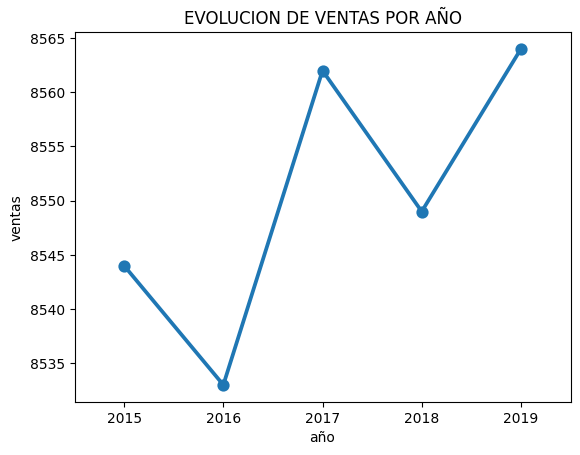

In [153]:
#¿COMO A SIDO LA EVOLUCION TEMPORAL DE VENTAS?
def solo_año(año):
    if type(año) !=str:
        return año
    else:
        return str(año).split("-")[2]
    
#aplicamos la funcion y creamos otra columna para no perder la informacion de la columna 'date'
banca['año'] = banca['date'].apply(solo_año)

ventas_por_año = banca.groupby('año')['id_'].count().reset_index()

sns.pointplot(data = ventas_por_año, x = 'año', y = 'id_').set_title("EVOLUCION DE VENTAS POR AÑO")
#cambio el nombre de los ejes
plt.ylabel("ventas")

Text(0.5, 0, 'ventas')

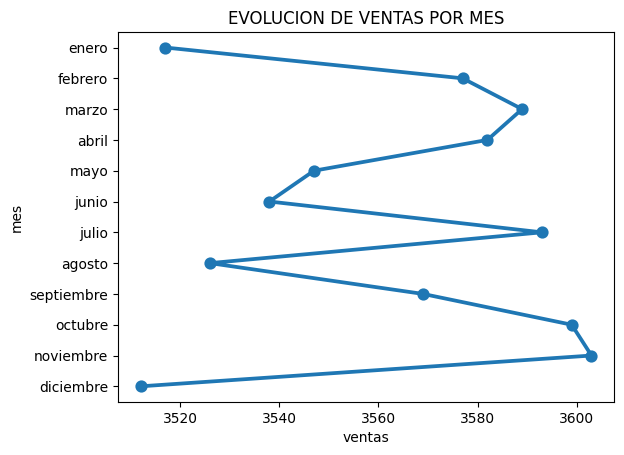

In [154]:
#AHORA VAMOS A VER COMO EVOLUCIONAN LA VENTAS A LO LARGO DEL AÑO EN LOS DIFERENTES MESES
def solo_mes(fecha):
    if type(fecha) !=str:
        return fecha
    else:
        return str(fecha).split("-")[1]
    
#aplicamos la funcion y creamos otra columna para no perder la informacion de la columna 'date'
banca['mes'] = banca['date'].apply(solo_mes)

ventas_por_mes = banca.groupby('mes')['id_'].count().reset_index()
ventas_por_mes #esto a generado un dataframe con los meses desordenados

#vamos a ordenarlos
orden_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

ventas_por_mes['mes'] = pd.Categorical(ventas_por_mes['mes'], categories = orden_meses, ordered = True)
sns.pointplot(data = ventas_por_mes, x = 'id_', y = 'mes').set_title("EVOLUCION DE VENTAS POR MES")
#cambio el nombre de los ejes
plt.xlabel("ventas")


PASAMOS AHORA AL ANALISIS DEL CONTENIDO DE EXCEL

In [155]:
#TENEMOS LA INFORMACION EN 3 DATAFRAMES DISTINTOS

#vamos a concatenarlos
clientes_2012_a_2014 = pd.concat([clientes_2012, clientes_2013, clientes_2014], axis = 0, join = 'inner')

In [156]:
#ANALISIS BASICOS

#1. Ingresos:
media = clientes_2012_a_2014['Income'].mean()
mediana = clientes_2012_a_2014['Income'].median()
maximo = clientes_2012_a_2014['Income'].max()
minimo = clientes_2012_a_2014['Income'].min()
print(f"La media de ingreos anuales es de {round(media, 2)}€, la mediana {mediana}€ y el sueldo más alto y más bajo es de {maximo}€ y {minimo}€ respectivamente")

La media de ingreos anuales es de 93227.39€, la mediana 93009.5€ y el sueldo más alto y más bajo es de 180802€ y 5841€ respectivamente


Text(0.5, 0, 'Nº de personas')

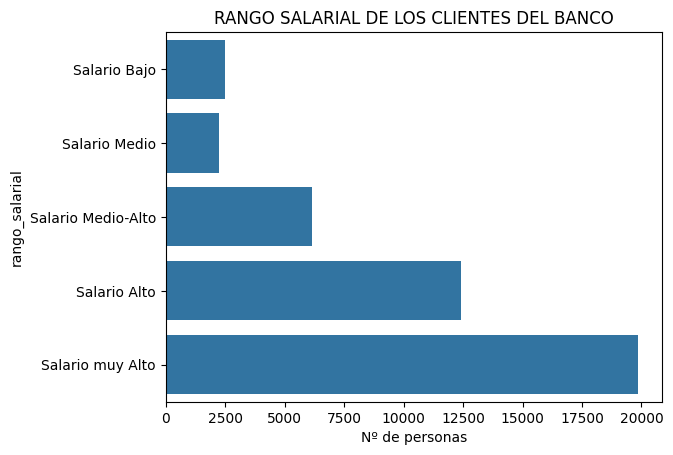

In [157]:
#2. Segmentacion de ingresos anuales

#antes de nada he comprobado cual el salario mas alto y mas bajo con df.max() y df.min()
def ratio_salario(salario):
    if 5000 < salario <= 16000:
        return 'Salario Bajo'
    elif 16000 < salario <= 25000:
        return 'Salario Medio'
    elif 25000 < salario < 50000:
        return 'Salario Medio-Alto'
    elif 50000 < salario < 100000:
        return 'Salario Alto'
    else:
        return 'Salario muy Alto'

clientes_2012_a_2014['rango_salarial'] = clientes_2012_a_2014['Income'].apply(ratio_salario)
rango_salarios = clientes_2012_a_2014.groupby('rango_salarial')['Income'].count().reset_index()
#el dataframe sale con los rangos desordenados, vamos a oredenarlos:
orden_salarios = ['Salario Bajo', 'Salario Medio', 'Salario Medio-Alto', 'Salario Alto', 'Salario muy Alto']

rango_salarios['rango_salarial'] = pd.Categorical(rango_salarios['rango_salarial'], categories = orden_salarios, ordered = True)
sns.barplot(data = rango_salarios, x = 'Income', y = 'rango_salarial').set_title("RANGO SALARIAL DE LOS CLIENTES DEL BANCO")

#cambio el nombre de los ejees
plt.xlabel('Nº de personas')

Text(0, 0.5, 'total')

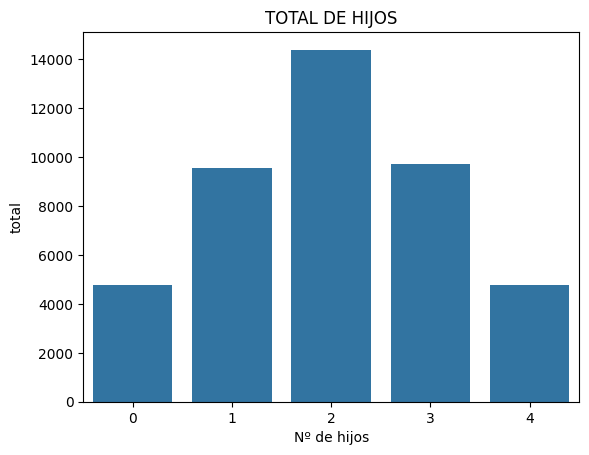

In [158]:
#3. Hijos
clientes_2012_a_2014['total_hijos'] = clientes_2012_a_2014['Kidhome'] + clientes_2012_a_2014['Teenhome']
hijos = clientes_2012_a_2014.groupby('total_hijos')['Income'].count().reset_index()
sns.barplot(data = hijos, x = 'total_hijos', y = 'Income').set_title('TOTAL DE HIJOS')
#cambio el nombre de los ejes
plt.xlabel("Nº de hijos")
plt.ylabel("total") 

In [159]:
#4. Visitas
#1. ¿Habrá mucha gente que hagas pocas visitas?
clientes_menosDe5_visitas = clientes_2012_a_2014[clientes_2012_a_2014['NumWebVisitsMonth'] < 5].count().reset_index().iloc[0, 1]
total_clientes = clientes_2012_a_2014.count().reset_index().iloc[0, 1]

print (f"El {round((clientes_menosDe5_visitas * 100)/total_clientes,2)}% de los clientes han hecho menos de 5 visitas a la web")

#2. ¿y que hagan muchas visitas?
clientes_masDe18_visitas = clientes_2012_a_2014[clientes_2012_a_2014['NumWebVisitsMonth'] > 18].count().reset_index().iloc[0, 1]
print (f"El {round((clientes_masDe18_visitas * 100)/total_clientes,2)}% de los clientes han hecho mas de 18 visitas a la web")

#3. Queremos detectcar cuales son esos clientes que tienen riesgo de abandono por su baja cantidad de visitas
clientes_riesgo_de_abandono = clientes_2012_a_2014[clientes_2012_a_2014['NumWebVisitsMonth'] < 5]['ID'].to_list()

El 12.43% de los clientes han hecho menos de 5 visitas a la web
El 44.21% de los clientes han hecho mas de 18 visitas a la web


In [160]:
#5. Años en el banco
def año(fecha):
    return str(fecha).split("-")[0] 

def tipo(año):
    return abs(int(año) - 2025) #valor absoluto para ver la diferencia

#Creamos una columna donde ira solo el año desde que el cliente incio sus servicios con el banco
clientes_2012_a_2014['año_antiguedad']  = clientes_2012_a_2014['Dt_Customer'].apply(año).apply(tipo)

#vamos a calcular los años medios de antiguedad por clientes
print(f"La media de antiguedad en el banco es de {round(clientes_2012_a_2014['año_antiguedad'].mean(), 2)} años y el clientes mas antiguo lleva {clientes_2012_a_2014['año_antiguedad'].max()} años y el mas reciente se incorporo en {2025 - clientes_2012_a_2014['año_antiguedad'].min()}")

La media de antiguedad en el banco es de 12.14 años y el clientes mas antiguo lleva 13 años y el mas reciente se incorporo en 2014


Text(0, 0.5, 'Nº de visitas')

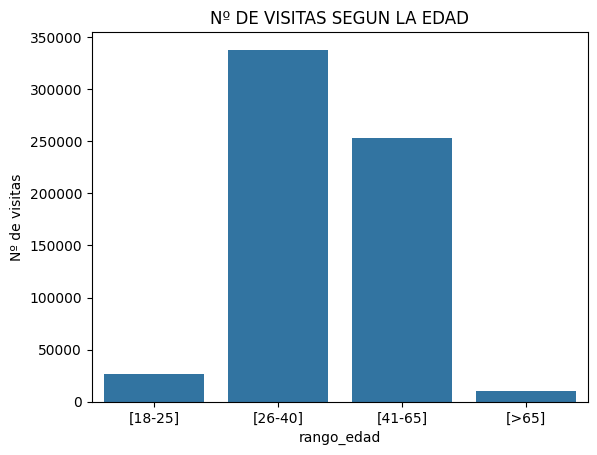

In [ ]:
#Unir ambos ficheros en funcion del id
union = banca.merge(clientes_2012_a_2014, how = 'inner', left_on ='id_', right_on = 'ID' )
union.set_index('ID')

#Ahora que tenemos el dataframe junto vamos a ver un ultimo parametro, ¿que segmentos de edad hacen mas visitas a la web?
def rango_edad(edad):
    if 18<= edad <= 25:
        return '[18-25]'
    elif 25< edad <= 40:
        return '[26-40]'
    elif 40< edad <= 65:
        return '[41-65]'
    elif 65 < edad :
        return '[>65]'
union['rango_edad'] = union['age'].apply(rango_edad)
edades = union.groupby('rango_edad')['NumWebVisitsMonth'].sum().reset_index()

sns.barplot(data = edades, x = 'rango_edad', y = 'NumWebVisitsMonth').set_title('Nº DE VISITAS SEGUN LA EDAD')
#cambio el nombre de los ejes
plt.ylabel("Nº de visitas") 